In [1]:
import pandas
import seaborn
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
d = './data_folds/{0}_{1}.xlsx'

In [138]:
fold_n = 5

In [139]:
data_train = pandas.read_excel(d.format('data_train', fold_n))
data_train['Unnamed: 0'] = pandas.to_datetime(data_train['Unnamed: 0'])
data_train = data_train.set_index('Unnamed: 0')
data_train

,A229RX0,AAA,AIRRTMFMD11,AWHAERT,AWHMAN,BAA,AWHAERT__p901x12_div_pct,TLT_aggmean_pct
Unnamed: 0,,,,,,,,
2012-12-01 00:00:00+00:00,41192,3.65,2879729,31.400000,41.700001,4.63,-0.72,-0.014325
2013-01-01 00:00:00+00:00,38789,3.80,3009944,31.400000,41.599998,4.73,-0.15,-0.034207
2013-02-01 00:00:00+00:00,38663,3.90,2994212,31.600000,41.900002,4.85,0.09,-0.016140
2013-03-01 00:00:00+00:00,38760,3.93,2937880,31.799999,41.900002,4.85,-0.02,-0.002086
2013-04-01 00:00:00+00:00,38855,3.73,2892520,31.500000,41.799999,4.59,-0.90,0.041433
2013-05-01 00:00:00+00:00,39019,3.89,2839030,31.500000,41.700001,4.73,-0.41,-0.029873
2013-06-01 00:00:00+00:00,39004,4.27,2902130,31.500000,41.799999,5.19,-0.41,-0.052431
2013-07-01 00:00:00+00:00,38942,4.34,2853990,31.500000,41.700001,5.32,-0.41,-0.035419
2013-08-01 00:00:00+00:00,39003,4.54,2919071,31.500000,41.900002,5.42,-0.41,-0.028956


In [140]:
data_test = pandas.read_excel(d.format('data_test', fold_n))
data_test['Unnamed: 0'] = pandas.to_datetime(data_test['Unnamed: 0'])
data_test = data_test.set_index('Unnamed: 0')
data_test

,A229RX0,AAA,AIRRTMFMD11,AWHAERT,AWHMAN,BAA,AWHAERT__p901x12_div_pct,TLT_aggmean_pct
Unnamed: 0,,,,,,,,
2016-03-01 00:00:00+00:00,41829,3.82,2995177,31.000000,41.799999,5.13,-0.74,-0.011824
2016-04-01 00:00:00+00:00,41727,3.62,3024095,31.100000,41.799999,4.79,0.00,0.010742
2016-05-01 00:00:00+00:00,41680,3.65,2978289,31.000000,41.900002,4.68,-0.72,0.000044
2016-06-01 00:00:00+00:00,41672,3.50,3051129,31.000000,41.799999,4.53,-0.35,0.034232
2016-07-01 00:00:00+00:00,41784,3.28,3047103,31.100000,42.000000,4.22,0.00,0.040967
2016-08-01 00:00:00+00:00,41791,3.32,3086460,30.900000,41.799999,4.24,-0.80,-0.007854
2016-09-01 00:00:00+00:00,41852,3.41,3141687,30.900000,41.900002,4.31,-0.35,-0.017425
2016-10-01 00:00:00+00:00,41884,3.51,3175225,30.900000,41.900002,4.38,-0.35,-0.027689
2016-11-01 00:00:00+00:00,41952,3.86,3233725,30.799999,41.799999,4.71,-0.72,-0.065264


In [141]:
driver = 'AWHAERT__p901x12_div_pct'
target = 'TLT_aggmean_pct'

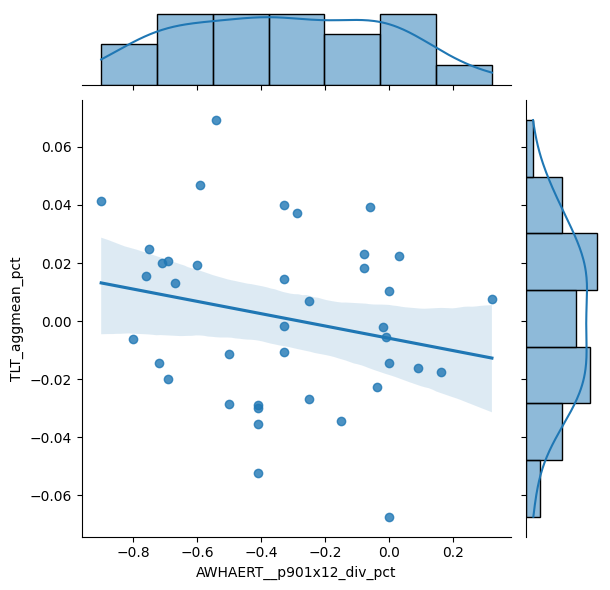

In [142]:
# seaborn.scatterplot(data=data_train, x=driver, y=target)
# seaborn.jointplot(data=data_train, x=driver, y=target, kind='kde')
seaborn.jointplot(data=data_train, x=driver, y=target, kind='reg')

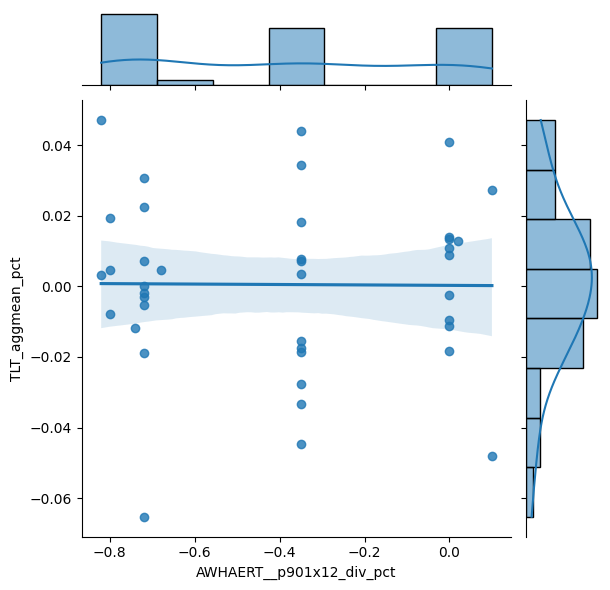

In [143]:
# seaborn.scatterplot(data=data_test, x=driver, y=target)
# seaborn.jointplot(data=data_test, x=driver, y=target, kind='kde')
seaborn.jointplot(data=data_test, x=driver, y=target, kind='reg')

In [144]:
from sklearn.metrics import r2_score
from scipy import stats

def r2_metric(x, y):
    return r2_score(y_pred=x, y_true=y)

def pv_metric(x, y):
    return stats.pearsonr(x, y)[0]

def ps_metric(x, y):
    return stats.pearsonr(x, y)[1]

In [145]:
model_no = LinearRegression()
model_no.fit(X=data_train[['AWHAERT']].values, y=data_train['TLT_aggmean_pct'].values)
y_train_hat_no = model_no.predict(X=data_train[['AWHAERT']].values)
y_test_hat_no = model_no.predict(X=data_test[['AWHAERT']].values)

model_ye = LinearRegression()
model_ye.fit(X=data_train[['AWHAERT__p901x12_div_pct']].values, y=data_train['TLT_aggmean_pct'].values)
y_train_hat_ye = model_ye.predict(X=data_train[['AWHAERT__p901x12_div_pct']].values)
y_test_hat_ye = model_ye.predict(X=data_test[['AWHAERT__p901x12_div_pct']].values)

(0.07328539343071261, 0.0509612682902405)

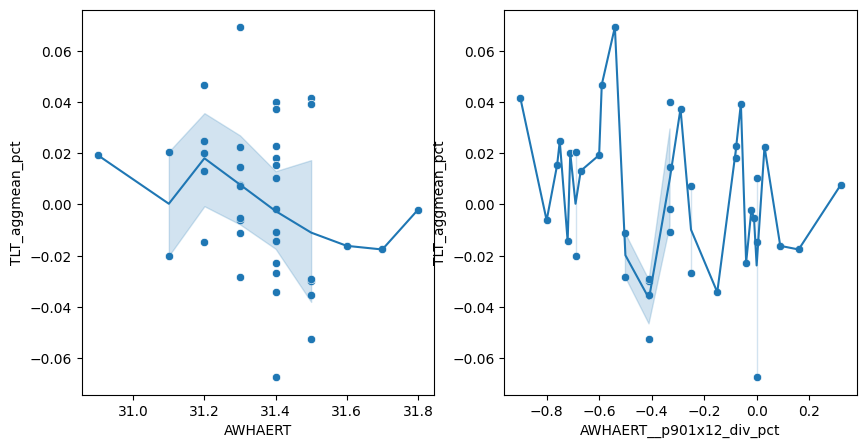

In [146]:
fig, ax = pyplot.subplots(1, 2, figsize=(10, 5))
seaborn.scatterplot(data=data_train, x='AWHAERT', y='TLT_aggmean_pct', ax=ax[0])
seaborn.lineplot(x=data_train['AWHAERT'].values, y=data_train['TLT_aggmean_pct'].values, ax=ax[0])
seaborn.scatterplot(data=data_train, x='AWHAERT__p901x12_div_pct', y='TLT_aggmean_pct', ax=ax[1])
seaborn.lineplot(x=data_train['AWHAERT__p901x12_div_pct'].values, y=data_train['TLT_aggmean_pct'].values, ax=ax[1])
r2_score(y_pred=y_train_hat_no, y_true=data_train['TLT_aggmean_pct'].values), r2_score(y_pred=y_train_hat_ye, y_true=data_train['TLT_aggmean_pct'].values)

(-0.8180727119070934, -0.08104900725098596)

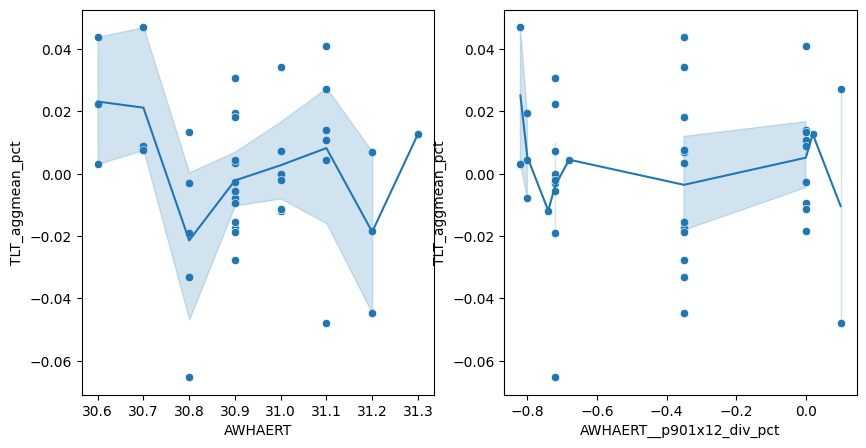

In [147]:
fig, ax = pyplot.subplots(1, 2, figsize=(10, 5))
seaborn.scatterplot(data=data_test, x='AWHAERT', y='TLT_aggmean_pct', ax=ax[0])
seaborn.lineplot(x=data_test['AWHAERT'].values, y=data_test['TLT_aggmean_pct'].values, ax=ax[0])
seaborn.scatterplot(data=data_test, x='AWHAERT__p901x12_div_pct', y='TLT_aggmean_pct', ax=ax[1])
seaborn.lineplot(x=data_test['AWHAERT__p901x12_div_pct'].values, y=data_test['TLT_aggmean_pct'].values, ax=ax[1])
r2_score(y_pred=y_test_hat_no, y_true=data_test['TLT_aggmean_pct'].values), r2_score(y_pred=y_test_hat_ye, y_true=data_test['TLT_aggmean_pct'].values)

In [148]:
from sklearn.preprocessing import KBinsDiscretizer

In [149]:
class Binner:
    def __init__(self, n_bins):
        self._binner = KBinsDiscretizer
        self._binner_kwg = {'encode': 'ordinal', 'strategy': 'quantile'}
        self.n_bins = n_bins
        self.binner = None
    def fit(self, X):
        self.binner = self._binner(n_bins=self.n_bins, **self._binner_kwg)
        self.binner.fit(X=X)
    def transform(self, X):
        binned = self.binner.transform(X=X)
        binned = binned / self.n_bins
        return binned

In [150]:
bb = Binner(n_bins=20)
bb.fit(X=data_train[['AWHAERT__p901x12_div_pct']].values)
data_train['A_binned'] = bb.transform(X=data_train[['AWHAERT__p901x12_div_pct']].values)
data_test['A_binned'] = bb.transform(X=data_test[['AWHAERT__p901x12_div_pct']].values)

C:\TET\env\macro_new\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [151]:
data_train

,A229RX0,AAA,AIRRTMFMD11,AWHAERT,AWHMAN,BAA,AWHAERT__p901x12_div_pct,TLT_aggmean_pct,A_binned
Unnamed: 0,,,,,,,,,
2012-12-01 00:00:00+00:00,41192,3.65,2879729,31.400000,41.700001,4.63,-0.72,-0.014325,0.10
2013-01-01 00:00:00+00:00,38789,3.80,3009944,31.400000,41.599998,4.73,-0.15,-0.034207,0.60
2013-02-01 00:00:00+00:00,38663,3.90,2994212,31.600000,41.900002,4.85,0.09,-0.016140,0.85
2013-03-01 00:00:00+00:00,38760,3.93,2937880,31.799999,41.900002,4.85,-0.02,-0.002086,0.70
2013-04-01 00:00:00+00:00,38855,3.73,2892520,31.500000,41.799999,4.59,-0.90,0.041433,0.00
2013-05-01 00:00:00+00:00,39019,3.89,2839030,31.500000,41.700001,4.73,-0.41,-0.029873,0.40
2013-06-01 00:00:00+00:00,39004,4.27,2902130,31.500000,41.799999,5.19,-0.41,-0.052431,0.40
2013-07-01 00:00:00+00:00,38942,4.34,2853990,31.500000,41.700001,5.32,-0.41,-0.035419,0.40
2013-08-01 00:00:00+00:00,39003,4.54,2919071,31.500000,41.900002,5.42,-0.41,-0.028956,0.40


In [152]:
data_test

,A229RX0,AAA,AIRRTMFMD11,AWHAERT,AWHMAN,BAA,AWHAERT__p901x12_div_pct,TLT_aggmean_pct,A_binned
Unnamed: 0,,,,,,,,,
2016-03-01 00:00:00+00:00,41829,3.82,2995177,31.000000,41.799999,5.13,-0.74,-0.011824,0.05
2016-04-01 00:00:00+00:00,41727,3.62,3024095,31.100000,41.799999,4.79,0.00,0.010742,0.80
2016-05-01 00:00:00+00:00,41680,3.65,2978289,31.000000,41.900002,4.68,-0.72,0.000044,0.10
2016-06-01 00:00:00+00:00,41672,3.50,3051129,31.000000,41.799999,4.53,-0.35,0.034232,0.45
2016-07-01 00:00:00+00:00,41784,3.28,3047103,31.100000,42.000000,4.22,0.00,0.040967,0.80
2016-08-01 00:00:00+00:00,41791,3.32,3086460,30.900000,41.799999,4.24,-0.80,-0.007854,0.00
2016-09-01 00:00:00+00:00,41852,3.41,3141687,30.900000,41.900002,4.31,-0.35,-0.017425,0.45
2016-10-01 00:00:00+00:00,41884,3.51,3175225,30.900000,41.900002,4.38,-0.35,-0.027689,0.45
2016-11-01 00:00:00+00:00,41952,3.86,3233725,30.799999,41.799999,4.71,-0.72,-0.065264,0.10


In [153]:
model_no = LinearRegression()
model_no.fit(X=data_train[['AWHAERT__p901x12_div_pct']].values, y=data_train['TLT_aggmean_pct'].values)
y_train_hat_no = model_no.predict(X=data_train[['AWHAERT__p901x12_div_pct']].values)
y_test_hat_no = model_no.predict(X=data_test[['AWHAERT__p901x12_div_pct']].values)

model_ye = LinearRegression()
model_ye.fit(X=data_train[['A_binned']].values, y=data_train['TLT_aggmean_pct'].values)
y_train_hat_ye = model_ye.predict(X=data_train[['A_binned']].values)
y_test_hat_ye = model_ye.predict(X=data_test[['A_binned']].values)

(0.0509612682902405, 0.05886199387341973)

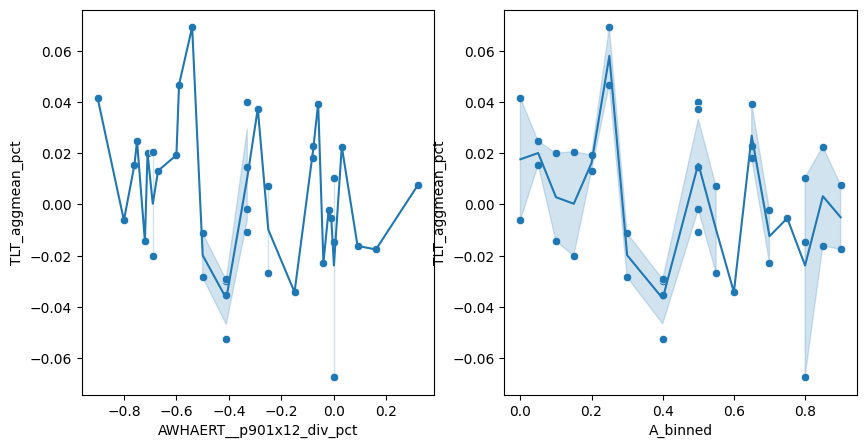

In [154]:
fig, ax = pyplot.subplots(1, 2, figsize=(10, 5))
seaborn.scatterplot(data=data_train, x='AWHAERT__p901x12_div_pct', y='TLT_aggmean_pct', ax=ax[0])
seaborn.lineplot(x=data_train['AWHAERT__p901x12_div_pct'].values, y=data_train['TLT_aggmean_pct'].values, ax=ax[0])
seaborn.scatterplot(data=data_train, x='A_binned', y='TLT_aggmean_pct', ax=ax[1])
seaborn.lineplot(x=data_train['A_binned'].values, y=data_train['TLT_aggmean_pct'].values, ax=ax[1])
r2_score(y_pred=y_train_hat_no, y_true=data_train['TLT_aggmean_pct'].values), r2_score(y_pred=y_train_hat_ye, y_true=data_train['TLT_aggmean_pct'].values)

(-0.08104900725098596, -0.11449232330812387)

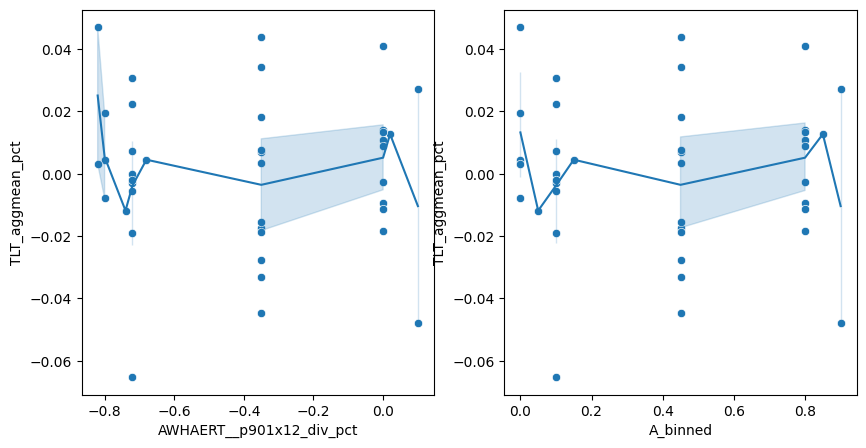

In [155]:
fig, ax = pyplot.subplots(1, 2, figsize=(10, 5))
seaborn.scatterplot(data=data_test, x='AWHAERT__p901x12_div_pct', y='TLT_aggmean_pct', ax=ax[0])
seaborn.lineplot(x=data_test['AWHAERT__p901x12_div_pct'].values, y=data_test['TLT_aggmean_pct'].values, ax=ax[0])
seaborn.scatterplot(data=data_test, x='A_binned', y='TLT_aggmean_pct', ax=ax[1])
seaborn.lineplot(x=data_test['A_binned'].values, y=data_test['TLT_aggmean_pct'].values, ax=ax[1])
r2_score(y_pred=y_test_hat_no, y_true=data_test['TLT_aggmean_pct'].values), r2_score(y_pred=y_test_hat_ye, y_true=data_test['TLT_aggmean_pct'].values)